YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)



Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


5


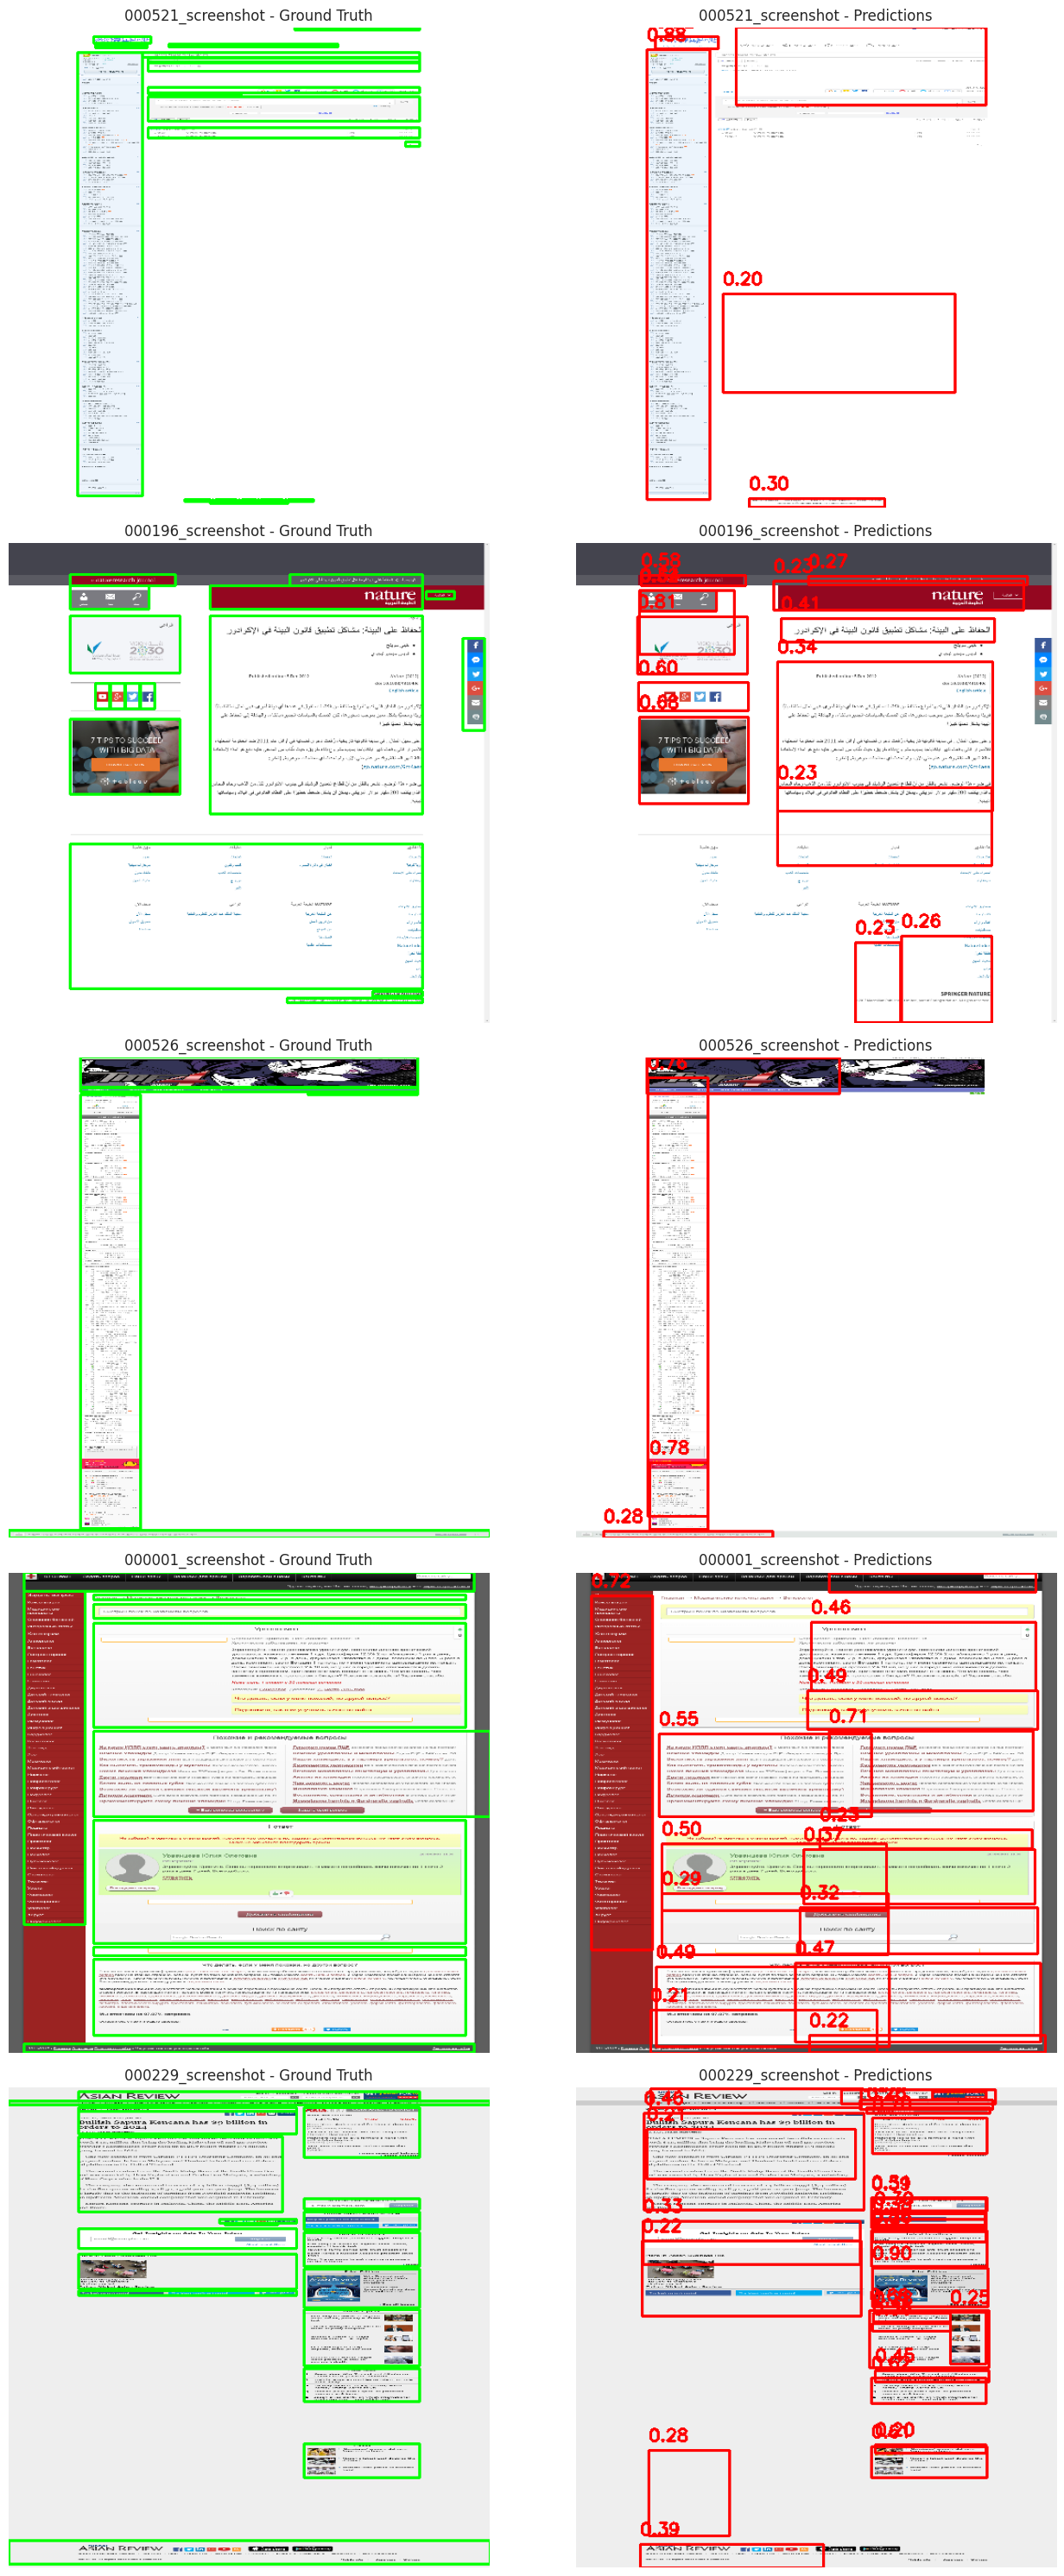

In [ ]:
%matplotlib inline
import cv2
import glob
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from models.experimental import attempt_load
from utils.torch_utils import select_device
from utils.general import non_max_suppression

def plot_labels_on_resized(img, label_path, target_size=(512,512)):
    resized_h, resized_w = target_size
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x1 = int((x_center - width/2) * resized_w)
            y1 = int((y_center - height/2) * resized_h)
            x2 = int((x_center + width/2) * resized_w)
            y2 = int((y_center + height/2) * resized_h)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth
    
    return img

def get_predictions(model, img, conf_thres=0.2, iou_thres=0.5):
    # Prepare image for inference
    img_tensor = torch.from_numpy(img).to(device)
    img_tensor = img_tensor.permute(2, 0, 1).float()
    img_tensor /= 255.0
    if len(img_tensor.shape) == 3:
        img_tensor = img_tensor[None]
    
    # Inference
    pred = model(img_tensor)
    pred = non_max_suppression(pred, conf_thres, iou_thres)
    return pred[0] if len(pred) > 0 else None

# Setup paths
val_img_dir = '../../data/webis-webseg-20-yolo-small/images/val'
val_label_dir = '../../data/webis-webseg-20-yolo-small/labels/val'

# Load model
weights = 'runs/train/Yolov5_imgsz512-webiswebseg21/weights/best.pt'
device = select_device('')
model = attempt_load(weights, device=device)

# Process images
images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
num_images = min(5, len(images))

# Create a figure with subplots
plt.figure(figsize=(15, 6*num_images))
plt.subplots_adjust(wspace=0.05, hspace=0.2)
print(num_images)
for i in range(num_images):
    img_path = images[i]
    base_name = Path(img_path).stem
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    
    # Read and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    resize_shape = (512, 512)
    img_resized = cv2.resize(img, resize_shape)
    pred_img = img_resized.copy()
    
    # Plot ground truth labels
    gt_img = plot_labels_on_resized(img_resized.copy(), label_path, resize_shape)
    
    # Get predictions
    predictions = get_predictions(model, pred_img)
    
    if predictions is not None:
        for *xyxy, conf, cls in predictions:
            # Convert tensor to CPU and get integers
            x1, y1, x2, y2 = [int(coord.cpu().item()) for coord in xyxy]
            
            # Draw bounding box on the predicted image
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red for predictions
            cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Display ground truth and prediction side by side
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(gt_img)
    plt.title(f'{base_name} - Ground Truth')
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(pred_img)
    plt.title(f'{base_name} - Predictions')
    plt.axis('off')

plt.tight_layout()
plt.show()

## No tiny segment data

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)



Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


['../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/val/000196.png', '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000001.png', '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000521.png', '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000526.png', '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000229.png']
Numimag: 5
../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/val/000196.png
../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000001.png
../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000521.png
../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000526.png
../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train/000229.png


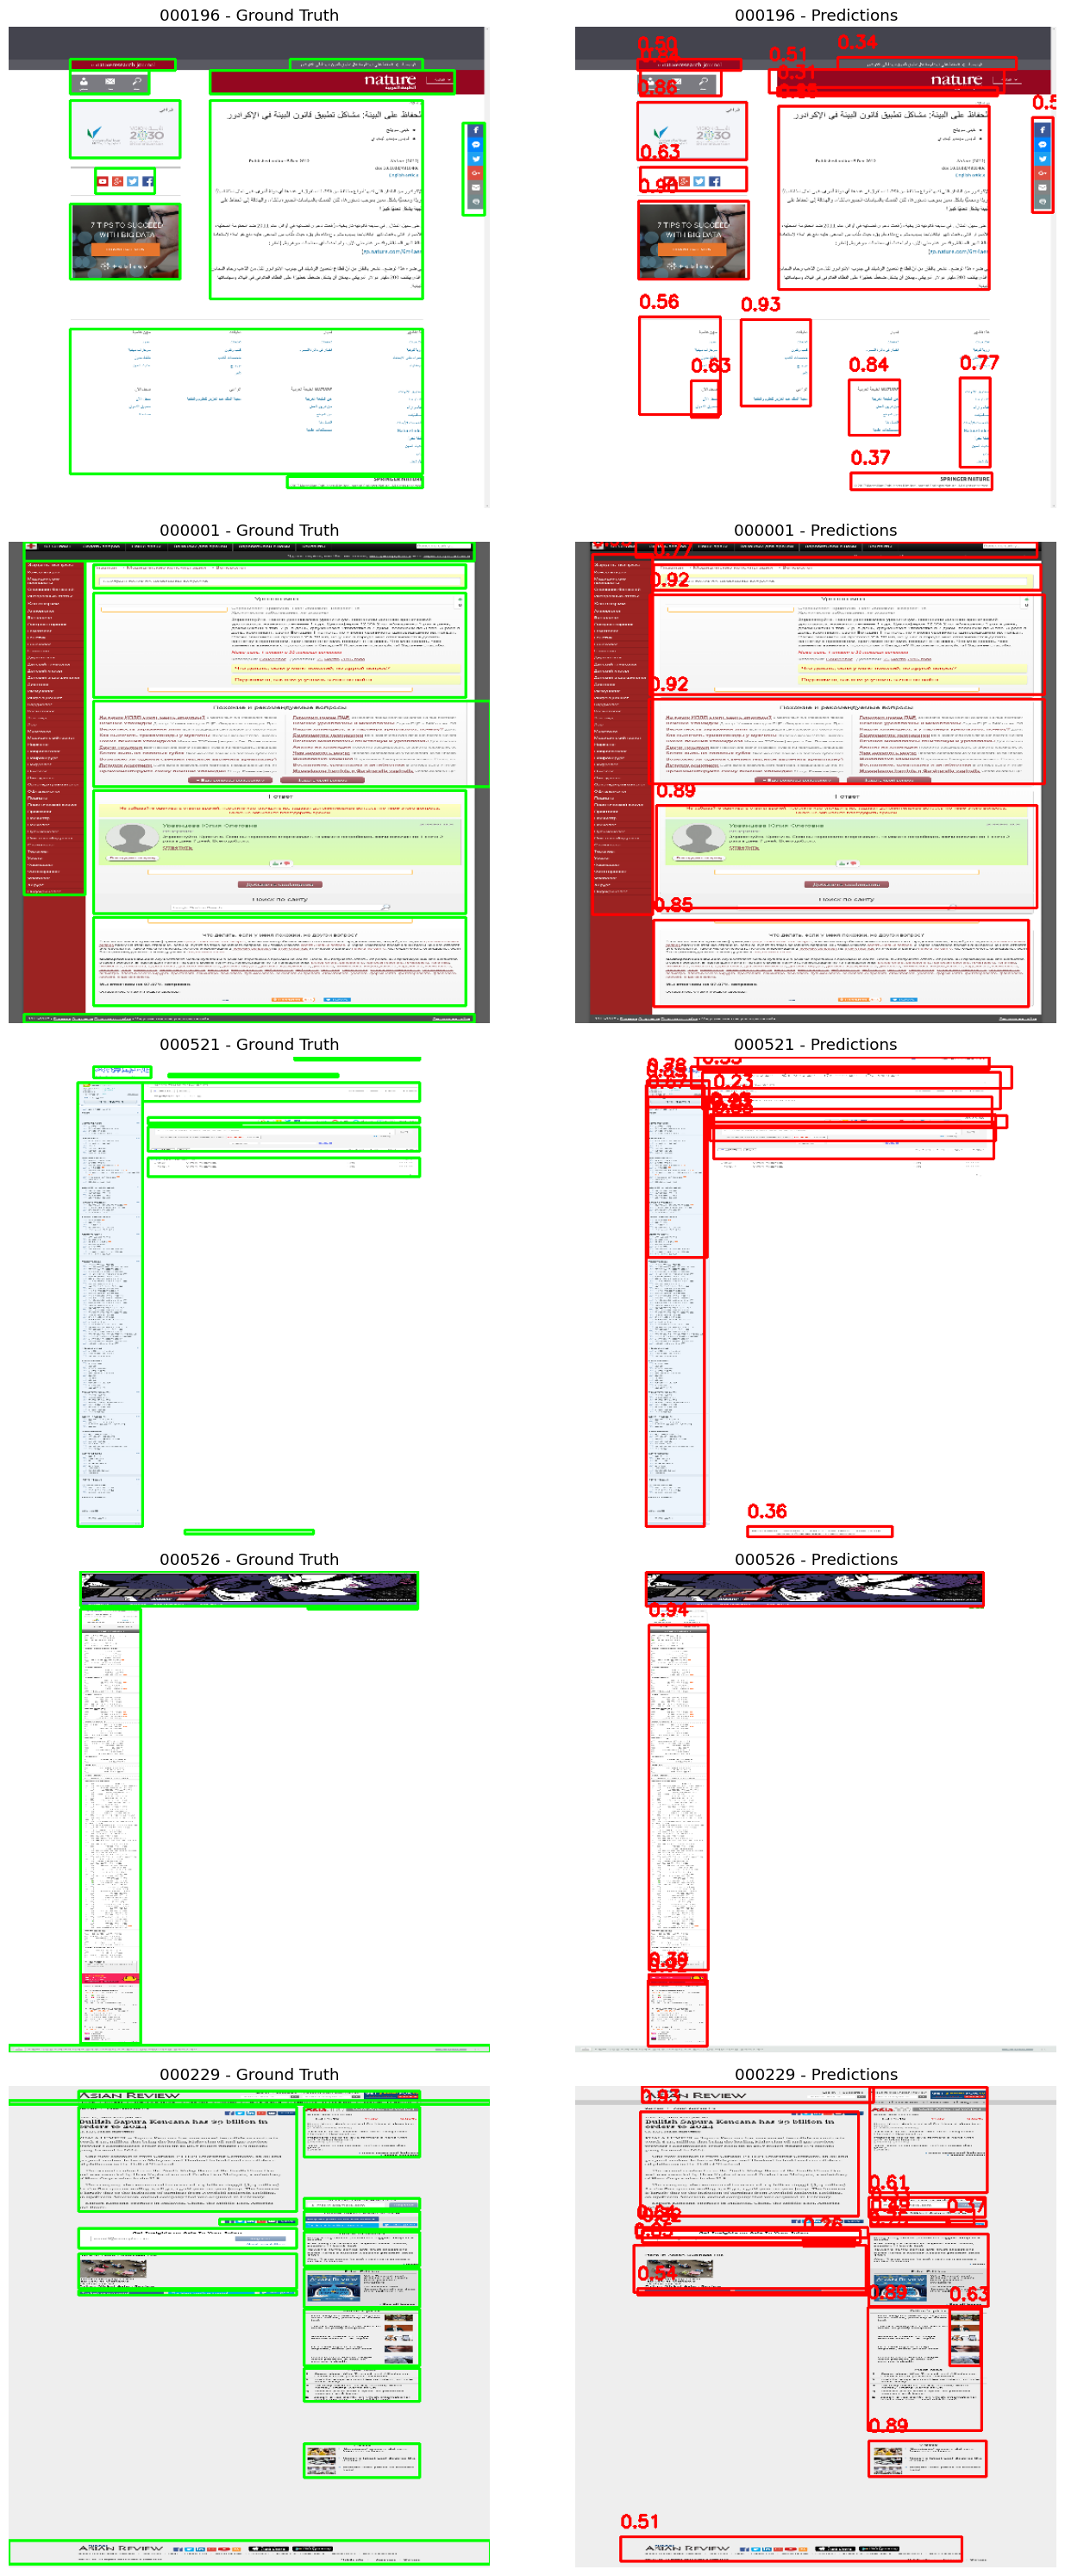

In [3]:
%matplotlib inline
import cv2
import glob
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from models.experimental import attempt_load
from utils.torch_utils import select_device
from utils.general import non_max_suppression

def plot_labels_on_resized(img, label_path, target_size=(512,512)):
    resized_h, resized_w = target_size
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x1 = int((x_center - width/2) * resized_w)
            y1 = int((y_center - height/2) * resized_h)
            x2 = int((x_center + width/2) * resized_w)
            y2 = int((y_center + height/2) * resized_h)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth
    
    return img

def get_predictions(model, img, conf_thres=0.2, iou_thres=0.5):
    # Prepare image for inference
    img_tensor = torch.from_numpy(img).to(device)
    img_tensor = img_tensor.permute(2, 0, 1).float()
    img_tensor /= 255.0
    if len(img_tensor.shape) == 3:
        img_tensor = img_tensor[None]
    
    # Inference
    pred = model(img_tensor)
    pred = non_max_suppression(pred, conf_thres, iou_thres)
    return pred[0] if len(pred) > 0 else None

# Setup paths
val_img_dir = '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/val'
train_img_dir = '../../data/webis-webseg-20-yolo-no-tiny-segments-full/images/train'
val_label_dir = '../../data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val'
train_label_dir = '../../data/webis-webseg-20-yolo-no-tiny-segments-full/labels/train'

# Load model
weights = 'runs/train/yolov5-imgsz512-no-tiny-segments/weights/best.pt'
device = select_device('')
model = attempt_load(weights, device=device)

# Process images
images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
images_train = glob.glob(os.path.join(train_img_dir, '*.[jp][pn][g]'))
images = images + images_train
num_images = min(5, len(images))

img_ids = ["000521", "000196", "000526", "000001", "000229"]

# get full path from images list
images = [img for img in images if any(img_id in img for img_id in img_ids)]

print(images)
# Create a figure with subplots
plt.figure(figsize=(15, 6*num_images))
plt.subplots_adjust(wspace=0.05, hspace=0.2)
print("Numimag:",num_images)
for i in range(num_images):
    img_path = images[i]
    print(img_path)
    base_name = Path(img_path).stem

    # get label path from val_label_dir or train_label_dir 
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    if not os.path.exists(label_path):
        label_path = os.path.join(train_label_dir, base_name + '.txt')
    
    # Read and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    resize_shape = (512, 512)
    img_resized = cv2.resize(img, resize_shape)
    pred_img = img_resized.copy()
    
    # Plot ground truth labels
    gt_img = plot_labels_on_resized(img_resized.copy(), label_path, resize_shape)
    
    # Get predictions
    predictions = get_predictions(model, pred_img)
    
    if predictions is not None:
        for *xyxy, conf, cls in predictions:
            # Convert tensor to CPU and get integers
            x1, y1, x2, y2 = [int(coord.cpu().item()) for coord in xyxy]
            
            # Draw bounding box on the predicted image
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red for predictions
            cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Display ground truth and prediction side by side
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(gt_img)
    plt.title(f'{base_name} - Ground Truth')
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(pred_img)
    plt.title(f'{base_name} - Predictions')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Nano data

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs


5


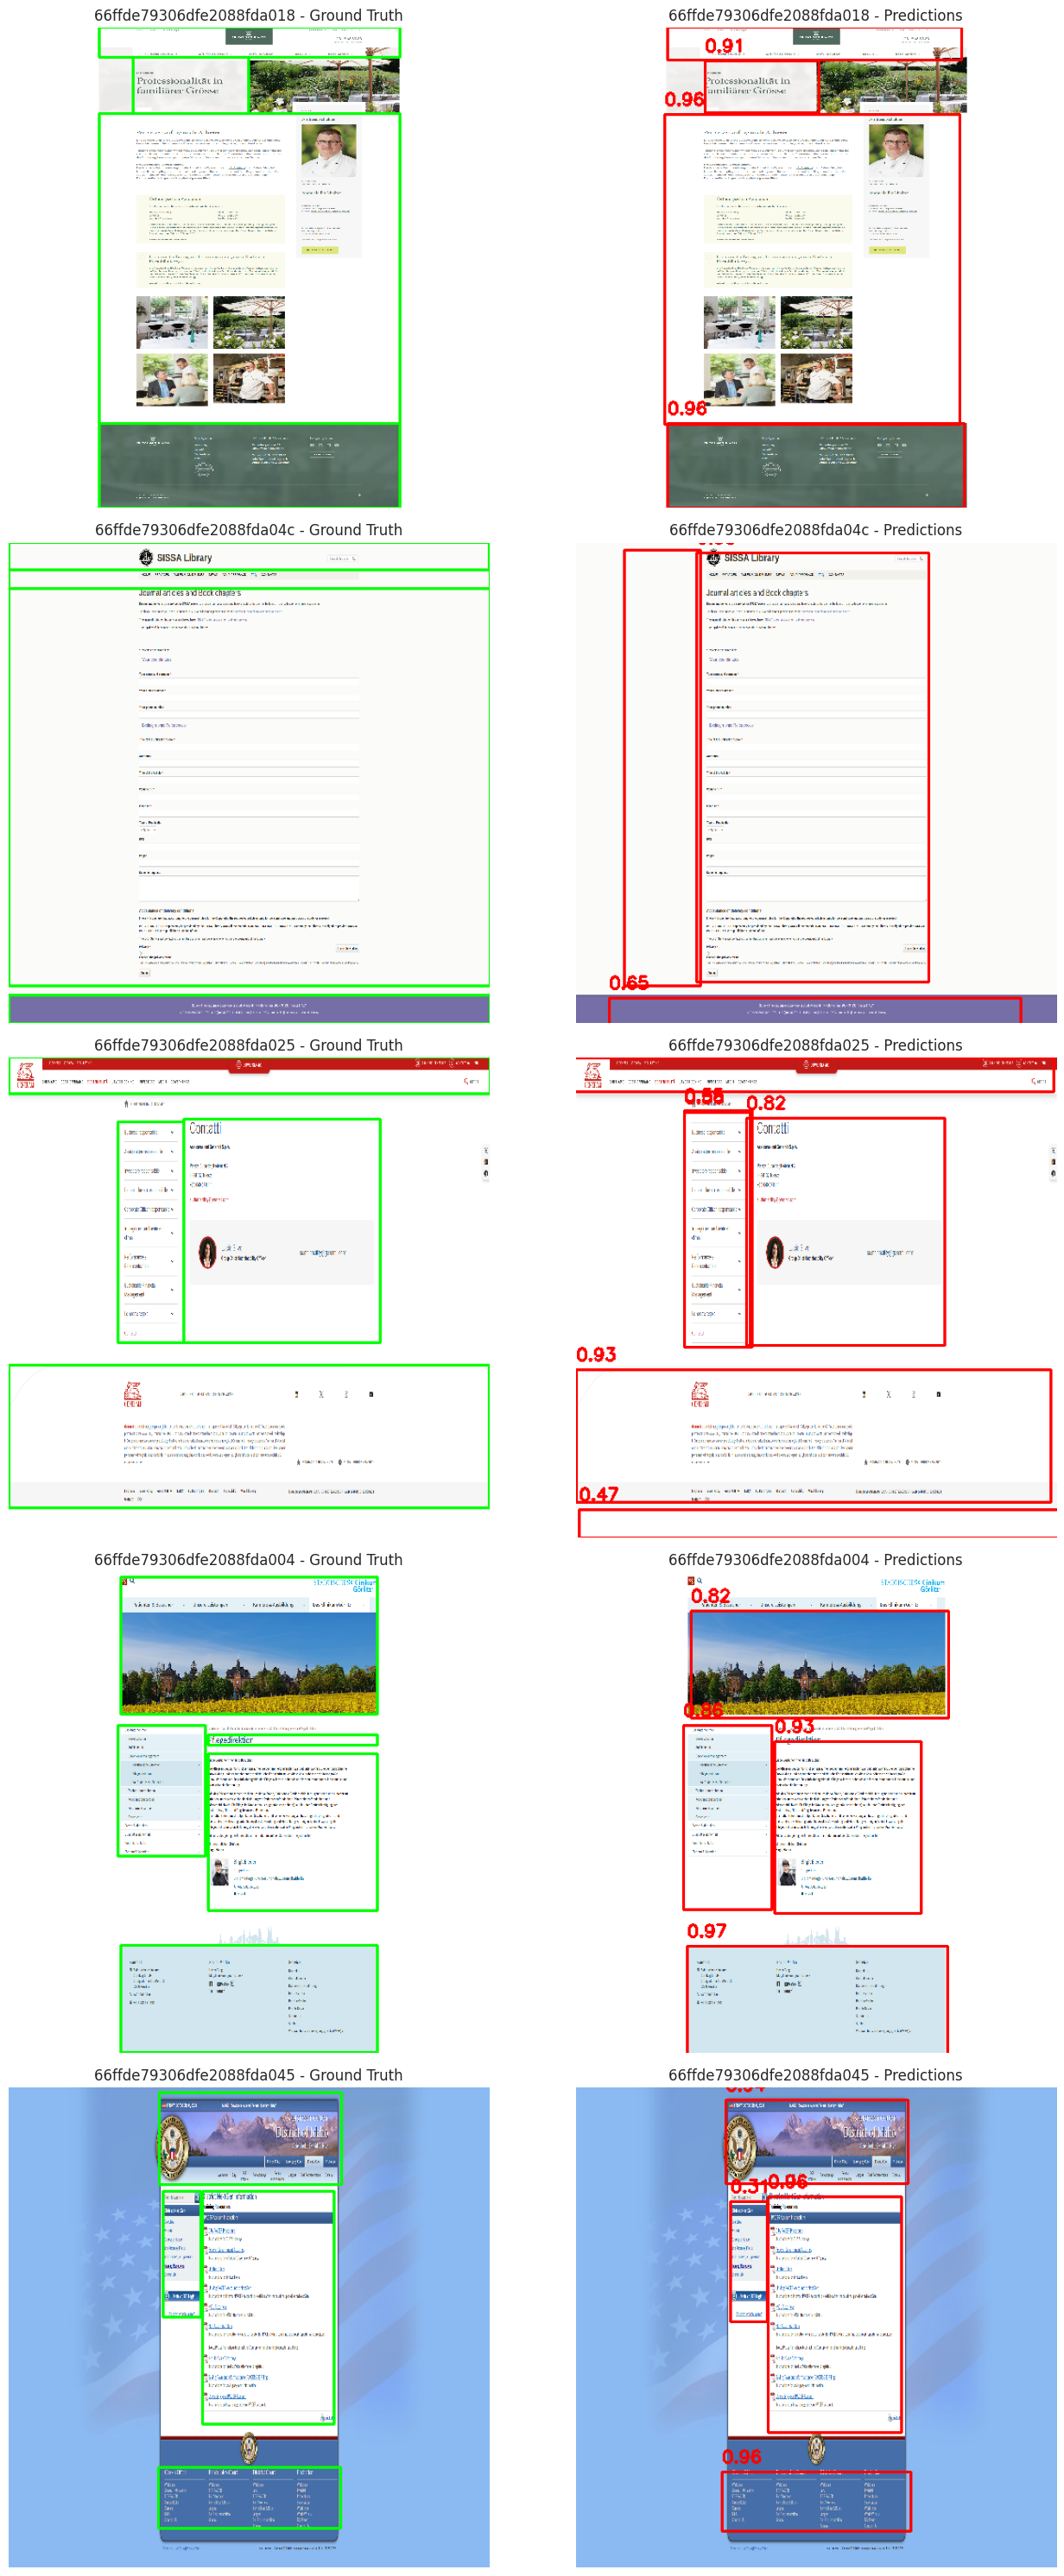

In [17]:
import copy


def plot_labels_on_resized(img, label_path, target_size=(512,512)):
    resized_h, resized_w = target_size
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x1 = int((x_center - width/2) * resized_w)
            y1 = int((y_center - height/2) * resized_h)
            x2 = int((x_center + width/2) * resized_w)
            y2 = int((y_center + height/2) * resized_h)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth
    
    return img

def get_predictions(model, img, conf_thres=0.2, iou_thres=0.5):
    # Prepare image for inference
    img_tensor = torch.from_numpy(img).to(device)
    img_tensor = img_tensor.permute(2, 0, 1).float()
    img_tensor /= 255.0
    if len(img_tensor.shape) == 3:
        img_tensor = img_tensor[None]
    
    # Inference
    pred = model(img_tensor)
    pred = non_max_suppression(pred, conf_thres, iou_thres)
    return pred[0] if len(pred) > 0 else None

# Setup paths
val_img_dir = '../../data/IIS_data_yolo_annotator_2_nano/images/val'
val_label_dir = '../../data/IIS_data_yolo_annotator_2_nano/labels/val'

# Load model
weights = 'runs/train/yolov5-imgsz512-NANO/weights/best.pt'
device = select_device('')
model = attempt_load(weights, device=device)

# Process images
images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
num_images = min(5, len(images))

# Create a figure with subplots
plt.figure(figsize=(15, 6*num_images))
plt.subplots_adjust(wspace=0.05, hspace=0.2)
print(num_images)
for i in range(num_images):
    img_path = images[i]
    base_name = Path(img_path).stem
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    
    # Read and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    resize_shape = (512, 512)
    img_resized = cv2.resize(img, resize_shape)
    pred_img = copy.deepcopy(img_resized)
    
    # Plot ground truth labels
    gt_img = copy.deepcopy(img_resized)
    gt_img = plot_labels_on_resized(gt_img, label_path, resize_shape)
    
    # Get predictions
    predictions = get_predictions(model, pred_img)
    
    if predictions is not None:
        for *xyxy, conf, cls in predictions:
            # Convert tensor to CPU and get integers
            x1, y1, x2, y2 = [int(coord.cpu().item()) for coord in xyxy]
            
            # Draw bounding box on the predicted image
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red for predictions
            cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Display ground truth and prediction side by side
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(gt_img)
    plt.title(f'{base_name} - Ground Truth')
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(pred_img)
    plt.title(f'{base_name} - Predictions')
    plt.axis('off')

plt.tight_layout()
plt.show()

## YOLOWS imgsz 512

In [3]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-WS-imgsz512-webiswebseg20/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-full/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with NMS
metrics = run(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-full/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5sWS summary: 264 layers, 7111910 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/labels/val.cache... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 54/54 [00:52<00:00,  1.04it/s]
                   all       1698      26334      0.746      0.163      0.448      0.305
Speed: 0.2ms pre-process, 5.6ms inference, 6.8ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp15
YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5sWS summary: 264 layers, 7111910 parameters, 0 gr

In [3]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-WS-no-tiny-segements-full/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with NMS
metrics = run(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 264 layers, 7111910 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val.cache... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 54/54 [01:43<00:00,  1.92s/it]
                   all       1698      15155      0.721      0.354      0.525      0.344
Speed: 0.4ms pre-process, 14.6ms inference, 12.8ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp34
YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 264 layers, 7111910 param

In [5]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-WS-imgsz512-NANO/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5sWS summary: 264 layers, 7122698 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 676.84it/s]
val: New cache created: /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]
                   all         20         78        0.2     0.0316      0.116      0.069
                header         20         19          0          0          0          0
                footer         20         19          1      0.158      0.579      0.345
            

In [7]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-WS-imgsz640-NANO/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5sWS summary: 264 layers, 7122698 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
                   all         20         78        0.2     0.0421      0.121     0.0787
                header         20         19          0          0          0          0
                footer         20         19          1      0.211      0.605      0.394
                   nav         20         12          0          0          0          0
           maincontent         20

## Yolov5 Standard Image size 512 webiswebseg 21

In [4]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/Yolov5_imgsz512-webiswebseg21/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-full/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/webis-webseg-20-yolo-full/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/labels/val.cache... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 54/54 [00:44<00:00,  1.21it/s]
                   all       1698      26334      0.553      0.191      0.368      0.231
Speed: 0.2ms pre-process, 4.0ms inference, 4.6ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp17
YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradie

In [6]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-imgsz512-NANO/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
                   all         20         78      0.873      0.781      0.866      0.691
                header         20         19      0.783      0.947      0.967      0.777
                footer         20         19      0.947      0.947      0.945      0.737
                   nav         20         12          1      0.583      0.792      0.671
           maincontent         20  

In [ ]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = 'runs/train/yolov5-imgsz640-NANO/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]
                   all         20         78      0.884      0.824      0.876      0.755
                header         20         19      0.872          1      0.985      0.859
                footer         20         19      0.947      0.947      0.969      0.833
                   nav         20         12          1       0.75      0.875       0.75
           maincontent         20    

: 

## YOLO Standard Image size 512 NANO

In [2]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = '/home/bruno/vt2-visual-webseg/src/yolov5/runs/train/yolov5-imgsz512-NANO/weights/last.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='../../data/IIS_data_yolo_annotator_2_nano/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 591.99it/s]
val: New cache created: /home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]
                   all         20         78      0.865      0.791      0.861      0.676
                header         20         19      0.864          1      0.988      0.785
                footer         20         19      0.947      0.947      0.945      0.735
              

## YOLOv5 Standard imgsz 512 no tiny segments webiswebseg20

In [ ]:
from val_wbf import run_validation_wbf
from val import run
from utils.torch_utils import select_device

weights = '/home/bruno/vt2-visual-webseg/src/yolov5/runs/train/yolov5-imgsz512-no-tiny-segments-full/weights/best.pt'
device = select_device('')

# run validation with WBF
metrics = run_validation_wbf(
    weights=weights,
    data='/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml',
    device=device,
    conf_thres=0.001,
    iou_thres=0.5,
    skip_box_thr=0.20
)

# run with nms
metrics = run(
    weights=weights,
    data='/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml',
    device=device,
    conf_thres=0.2,
    iou_thres=0.5
)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:01<00:00, 1516.60it/s]
val: New cache created: /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 54/54 [00:46<00:00,  1.17it/s]
                   all       1698      15155      0.666      0.521      0.565      0.385
Speed: 0.2ms pre-process, 3.8ms inference, 6.2ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp29
YOLOv5 🚀 2025-2-11 Python-3.11.5 torch-

: 

## ULTRALYTICS YOLOV11 EXAMPLE (512x512)

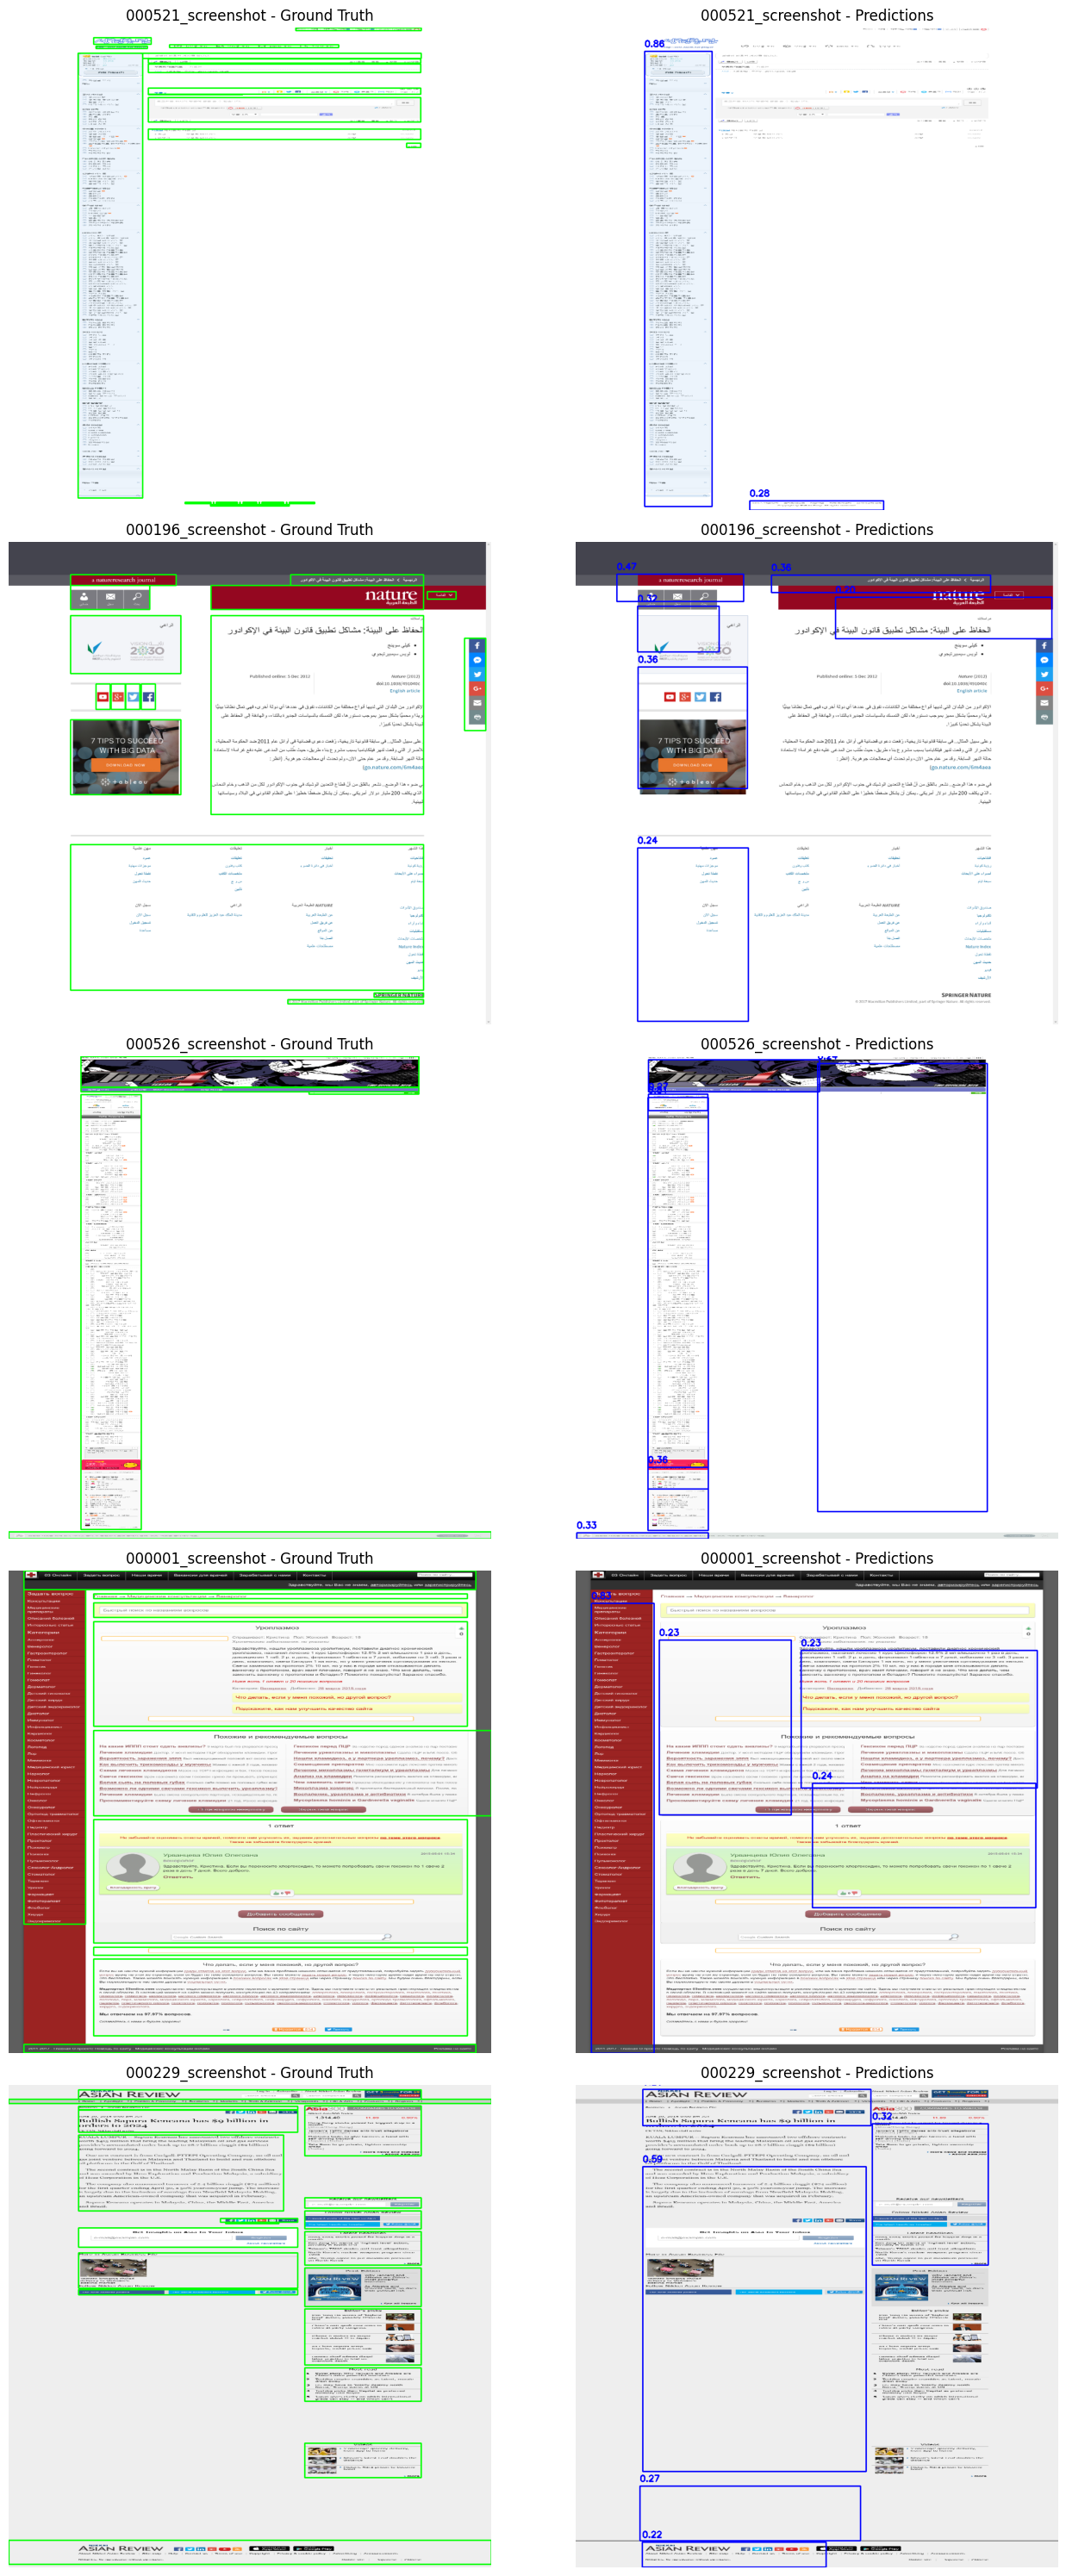

In [2]:
import cv2
import glob
import os
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

def plot_labels_on_resized(img, label_path, target_size=(512,512)):
    resized_h, resized_w = target_size
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x1 = int((x_center - width/2) * resized_w)
            y1 = int((y_center - height/2) * resized_h)
            x2 = int((x_center + width/2) * resized_w)
            y2 = int((y_center + height/2) * resized_h)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth
    
    return img

# Setup paths
val_img_dir = '../../data/webis-webseg-20-yolo-small/images/val'
val_label_dir = '../../data/webis-webseg-20-yolo-small/labels/val'

# Load model
model = YOLO('../../runs/detect/standard_ultralytics_yolov11s_batch_size_32_imgs_512/weights/best.pt')

# Process images
images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
num_images = min(5, len(images))

# Create a figure with subplots
plt.figure(figsize=(15, 6*num_images))
plt.subplots_adjust(wspace=0.05, hspace=0.2)

for i in range(num_images):
    img_path = images[i]
    base_name = Path(img_path).stem
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    
    # Read and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    resize_shape = (1024, 1024)
    img_resized = cv2.resize(img, resize_shape)
    pred_img = img_resized.copy()
    
    # Plot ground truth labels
    gt_img = plot_labels_on_resized(img_resized.copy(), label_path, resize_shape)
    
    # Get predictions
    results = model.predict(source=pred_img, conf=0.2, iou=0.5, verbose=False)
    
    # Process results
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            conf = float(box.conf[0])
            
            # Draw bounding box on the predicted image
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    
    # Display ground truth and prediction side by side
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(gt_img)
    plt.title(f'{base_name} - Ground Truth')
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(pred_img)
    plt.title(f'{base_name} - Predictions')
    plt.axis('off')

plt.tight_layout()
plt.show()

## ULTRALYTICS YOLOV11 EXAMPLE (1024x1024)

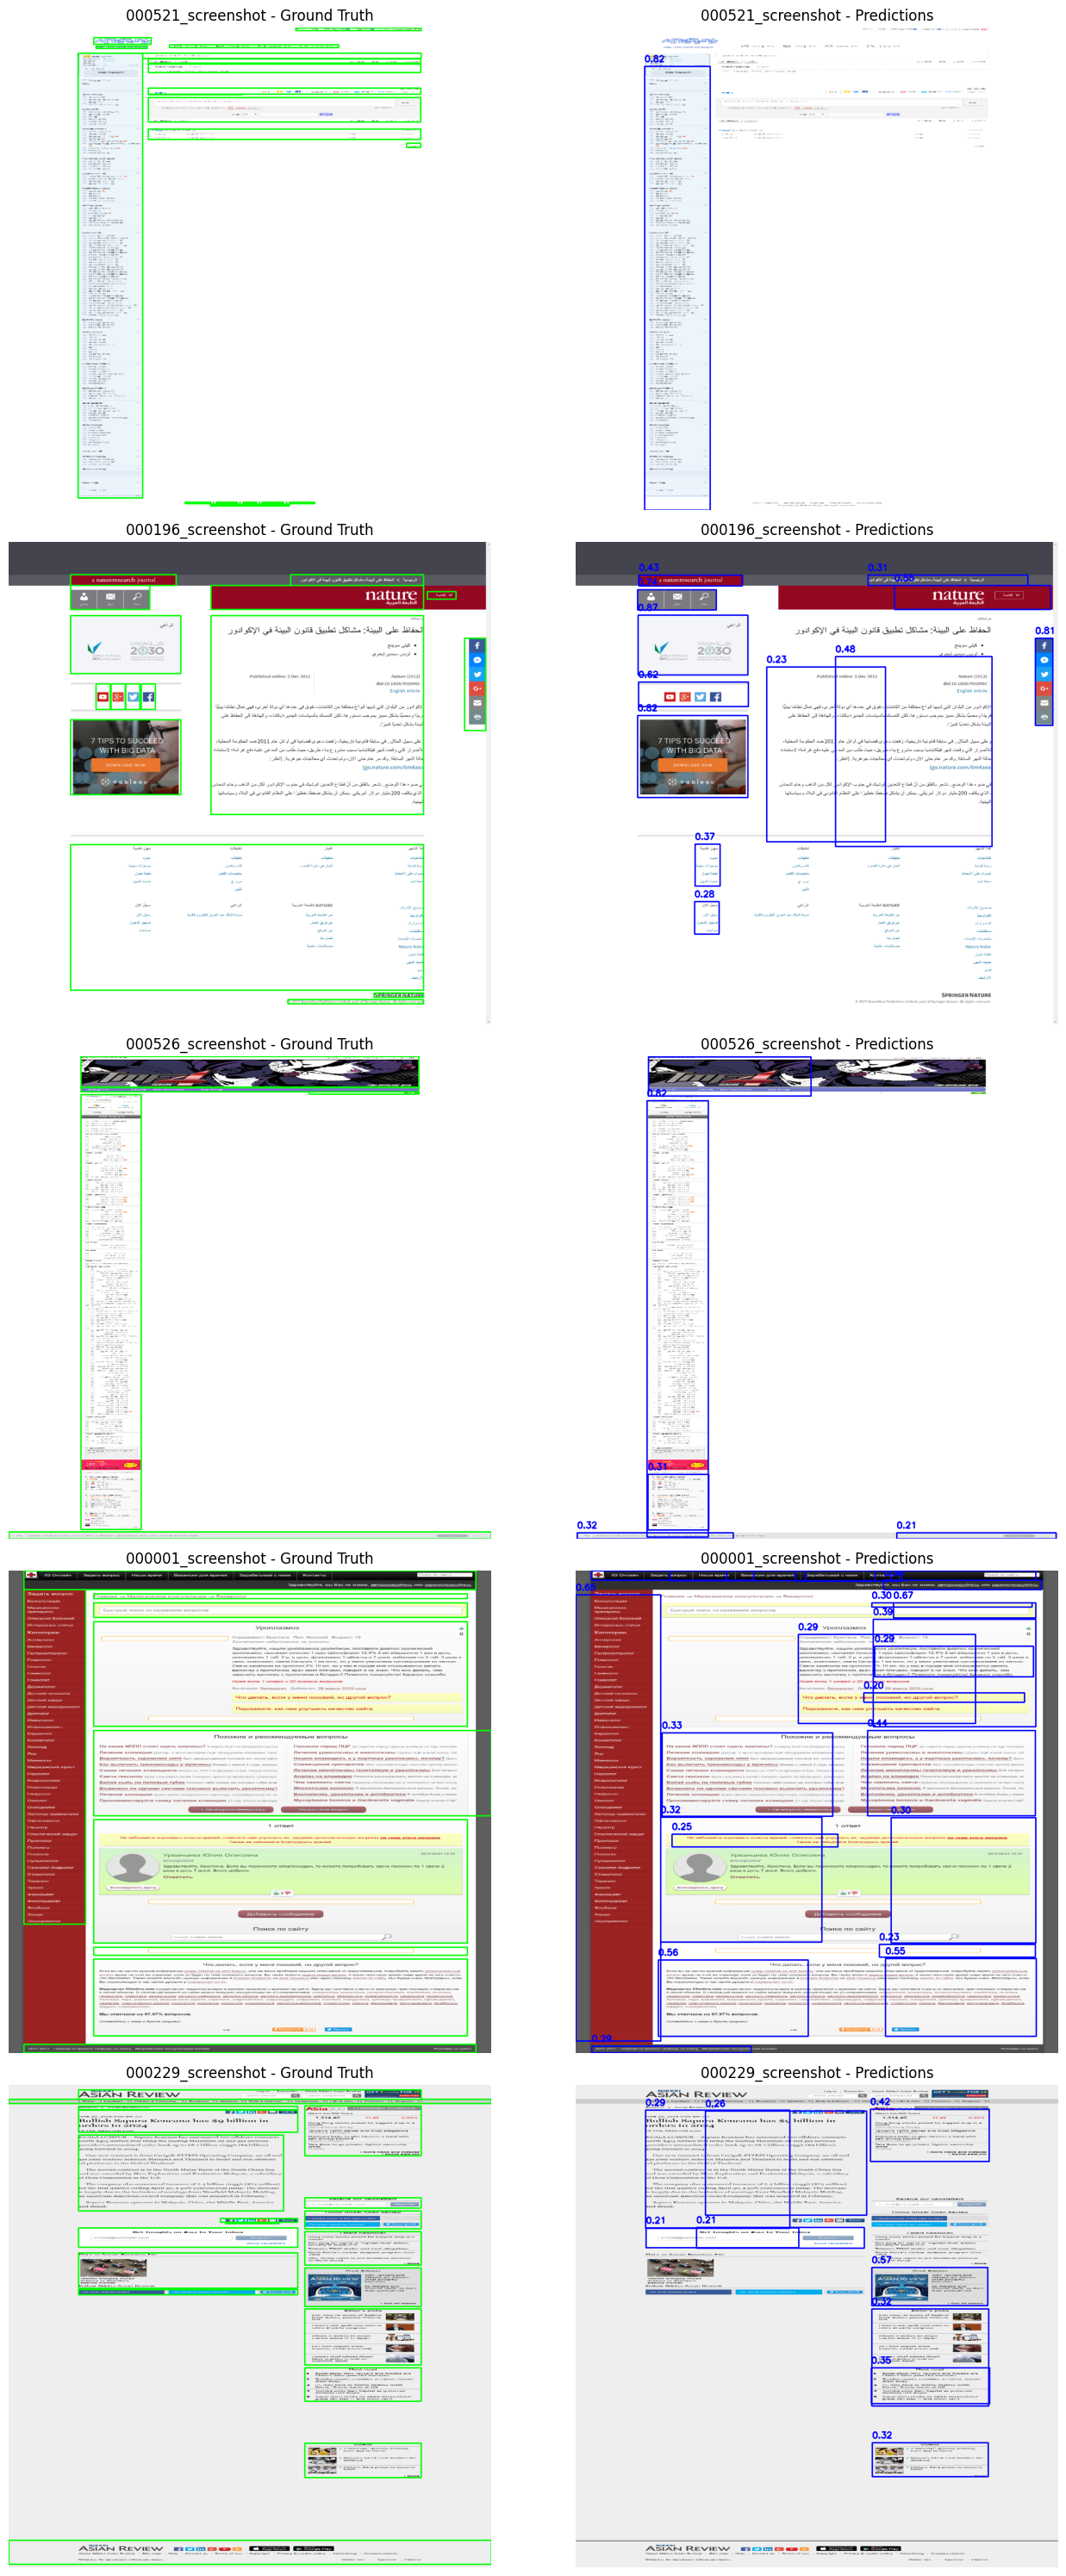

In [1]:
import cv2
import glob
import os
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

def plot_labels_on_resized(img, label_path, target_size=(512,512)):
    resized_h, resized_w = target_size
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x1 = int((x_center - width/2) * resized_w)
            y1 = int((y_center - height/2) * resized_h)
            x2 = int((x_center + width/2) * resized_w)
            y2 = int((y_center + height/2) * resized_h)
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth
    
    return img

# Setup paths
val_img_dir = '../../data/webis-webseg-20-yolo-small/images/val'
val_label_dir = '../../data/webis-webseg-20-yolo-small/labels/val'

# Load model
model = YOLO('../../runs/detect/standard_ultralytics_yolov11s_batch_size_32_imgs_1024_rect/weights/best.pt')

# Process images
images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
num_images = min(5, len(images))

# Create a figure with subplots
plt.figure(figsize=(15, 6*num_images))
plt.subplots_adjust(wspace=0.05, hspace=0.2)

for i in range(num_images):
    img_path = images[i]
    base_name = Path(img_path).stem
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    
    # Read and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    resize_shape = (1024, 1024)
    img_resized = cv2.resize(img, resize_shape)
    pred_img = img_resized.copy()
    
    # Plot ground truth labels
    gt_img = plot_labels_on_resized(img_resized.copy(), label_path, resize_shape)
    
    # Get predictions
    results = model.predict(source=pred_img, conf=0.2, iou=0.5, verbose=False)
    
    # Process results
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            conf = float(box.conf[0])
            
            # Draw bounding box on the predicted image
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    
    # Display ground truth and prediction side by side
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(gt_img)
    plt.title(f'{base_name} - Ground Truth')
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(pred_img)
    plt.title(f'{base_name} - Predictions')
    plt.axis('off')

plt.tight_layout()
plt.show()

## DOG TEST


0: 512x512 1 webpage_segment, 9.8ms
Speed: 3.8ms preprocess, 9.8ms inference, 183.2ms postprocess per image at shape (1, 3, 512, 512)
Drawing box: x1=277, y1=0, x2=512, y2=512, conf=0.52


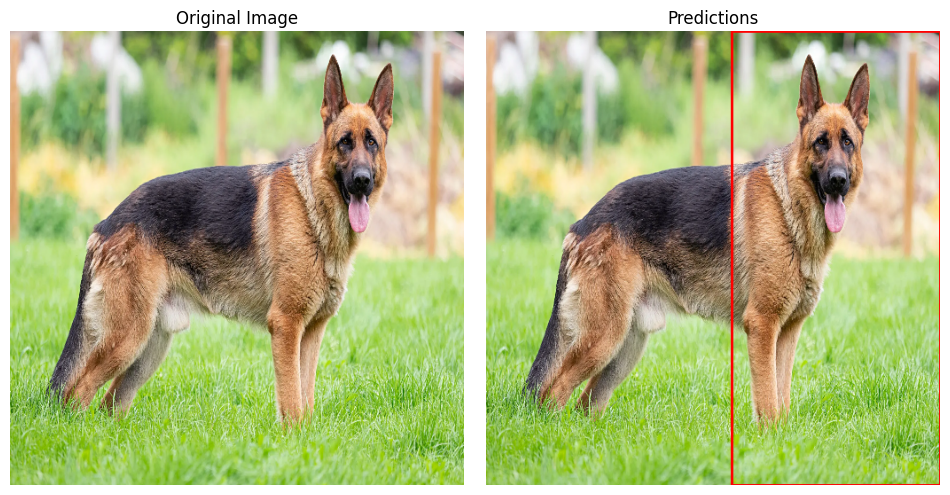

In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = YOLO('../../runs/detect/standard_ultralytics_yolov11s_batch_size_32_imgs_512/weights/best.pt')

# Process single image
img_path = '../../data/dog.png'
img = cv2.imread(img_path)
resize_shape = (512, 512)
img_resized = cv2.resize(img, resize_shape)
pred_img = img_resized.copy()

# Convert BGR to RGB for matplotlib
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

# Run prediction
results = model.predict(source=pred_img, conf=0.2, iou=0.45, verbose=True)

# Process results
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        # Get confidence
        conf = float(box.conf[0])
        
        # Debugging: Print each box
        print(f"Drawing box: x1={x1}, y1={y1}, x2={x2}, y2={y2}, conf={conf:.2f}")
        
        # Draw bounding box on the predicted image
        cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red in RGB
        cv2.putText(pred_img, f'{conf:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display original and predicted images side by side
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.05)  # Reduce space between images

plt.subplot(1, 2, 1)
plt.imshow(img_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_img)
plt.title('Predictions')
plt.axis('off')

plt.show()

## Normal YOLOV11 metric calculation

In [16]:
from ultralytics import YOLO

# Load model
model = YOLO('../../runs/detect/yolov11s-imgsz512-webis-webseg-full/weights/best.pt')

# Run validation on the full dataset
metrics = model.val(
    data='../../data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml',
    conf=0.2,  # confidence threshold
    iou=0.5,   # NMS IoU threshold
    verbose=True
)

Ultralytics 8.3.65 🚀 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:35<00:00, 47.82it/s]

val: New cache created: /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:25<00:00,  4.27it/s]


                   all       1698      15155      0.638      0.624      0.638      0.456
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /home/bruno/vt2-visual-webseg/runs/detect/val21


## YOLOv11 with WBF

In [1]:
from ultralytics import YOLO
import numpy as np
from ensemble_boxes_wbf import weighted_boxes_fusion
import yaml
import os
from pathlib import Path
from ultralytics.utils.metrics import box_iou
from ultralytics.utils.metrics import DetMetrics
from ultralytics.engine.results import Results
import torch
from tqdm import tqdm

def process_predictions_with_wbf(pred, conf_thres=0.2, iou_thres=0.50, orig_shape=None):
    """
    Apply WBF directly on raw predictions instead of post-NMS boxes
    """
    # Get boxes, scores and labels from raw predictions
    boxes = pred[0][:, :4].cpu().numpy()  # first 4 elements are box coords
    scores = pred[0][:, 4].cpu().numpy()  # 5th element is objectness
    labels = pred[0][:, 5].cpu().numpy()  # 6th element is class

    # Normalize boxes to [0-1] range
    if len(boxes) > 0:
        boxes_normalized = boxes.copy()
        boxes_normalized[:, [0, 2]] /= orig_shape[1]
        boxes_normalized[:, [1, 3]] /= orig_shape[0]
        
        # Create lists with single elements for WBF
        boxes_list = [boxes_normalized]
        scores_list = [scores]
        labels_list = [labels]
        
        # Apply WBF
        boxes_wbf, scores_wbf, labels_wbf = weighted_boxes_fusion(
            boxes_list=boxes_list,
            scores_list=scores_list,
            labels_list=labels_list,
            weights=None,
            iou_thr=iou_thres,
            skip_box_thr=conf_thres,
            conf_type='avg'
        )
        
        # Denormalize boxes back to pixel coordinates
        boxes_wbf[:, [0, 2]] *= orig_shape[1]
        boxes_wbf[:, [1, 3]] *= orig_shape[0]
        
        # Create array in ultralytics format (xyxy, conf, cls)
        n = len(boxes_wbf)
        boxes_with_scores = np.zeros((n, 6), dtype=np.float32)
        boxes_with_scores[:, :4] = boxes_wbf
        boxes_with_scores[:, 4] = scores_wbf
        boxes_with_scores[:, 5] = labels_wbf
        
        return boxes_with_scores
    else:
        return np.zeros((0, 6))
    

def process_single_image_metrics(result, label_path, all_metrics):
    if not os.path.exists(label_path):
        return
        
    gt = np.loadtxt(label_path)
    if gt.ndim == 1:
        gt = gt.reshape(1, -1)
    
    gt_labels = torch.from_numpy(gt[:, 0])
    
    if result.boxes is None or len(result.boxes) == 0:
        correct = torch.zeros((0, 1))
        pred_scores = torch.zeros(0)
        pred_labels = torch.zeros(0)
    else:
        pred_boxes = result.boxes.xyxy
        pred_scores = result.boxes.conf
        pred_labels = result.boxes.cls
        
        img_width, img_height = result.orig_shape[1], result.orig_shape[0]
        gt_boxes = torch.from_numpy(gt[:, 1:])
        gt_boxes_xyxy = torch.zeros_like(gt_boxes)
        gt_boxes_xyxy[:, 0] = (gt_boxes[:, 0] - gt_boxes[:, 2] / 2) * img_width
        gt_boxes_xyxy[:, 1] = (gt_boxes[:, 1] - gt_boxes[:, 3] / 2) * img_height
        gt_boxes_xyxy[:, 2] = (gt_boxes[:, 0] + gt_boxes[:, 2] / 2) * img_width
        gt_boxes_xyxy[:, 3] = (gt_boxes[:, 1] + gt_boxes[:, 3] / 2) * img_height
        
        """print("Pred boxes shape:", pred_boxes.shape)
        print("GT boxes shape:", gt_boxes_xyxy.shape)
        print("Sample pred box:", pred_boxes[0])
        print("Sample GT box:", gt_boxes_xyxy[0])"""
        
        # Calculate IoU and determine true positives
        iou = box_iou(pred_boxes, gt_boxes_xyxy)
        #print("IoU matrix shape:", iou.shape)
        #print("Max IoU values:", iou.max(dim=1)[0])
        
        correct = torch.zeros((len(pred_boxes), 1))
        for i in range(len(pred_boxes)):
            if len(gt_boxes) > 0:
                best_iou, best_gt = iou[i].max(0)
                if best_iou >= 0.5:
                    correct[i, 0] = 1
                    #print(f"Match found for pred box {i} with IoU {best_iou:.3f}")
    
    # Update metrics
    all_metrics.process(
        tp=correct,
        conf=pred_scores,
        pred_cls=pred_labels,
        target_cls=gt_labels
    )

model = YOLO('../../runs/detect/standard_yolov11s/weights/best.pt')
with open('../../data/webis-webseg-20-yolo-full/dataset.yaml', 'r') as f:
    dataset_config = yaml.safe_load(f)
val_path = dataset_config["path"] + "/" + dataset_config['val']
valid_extensions = ['.jpg', '.jpeg', '.png']
val_images = []
for ext in valid_extensions:
    val_images.extend(list(Path(val_path).glob(f'*{ext}')))

# Main validation loop
all_metrics = DetMetrics()

for val_img_path in tqdm(val_images, desc='Processing validation images'):
    # Get raw predictions without NMS
    results = model.predict(
        source=str(val_img_path),
        verbose=False,
        conf=0.001,  # Very low confidence to get more raw predictions
        iou=1.0,     # High IoU threshold to avoid NMS filtering
        max_det=None,  # No limit on detections
        agnostic_nms=True  # Agnostic NMS to get more predictions
    )
    
    # Get original image shape
    orig_shape = results[0].orig_shape
    
    # Get raw predictions tensor
    raw_pred = results[0].boxes.data
    
    # Apply WBF directly on raw predictions
    boxes_with_scores = process_predictions_with_wbf(
        [raw_pred], 
        conf_thres=0.2, 
        iou_thres=0.50,
        orig_shape=orig_shape
    )
    
    # Create Results object with WBF boxes
    result = Results(
        orig_img=results[0].orig_img,
        path=results[0].path,
        names=results[0].names,
        boxes=torch.from_numpy(boxes_with_scores)
    )
    
    # Process metrics
    label_path = str(Path(result.path).parent.parent.parent / 'labels' / 'val' / (Path(result.path).stem + '.txt'))
    process_single_image_metrics(result, label_path, all_metrics)

# Get final metrics
final_metrics = all_metrics.results_dict
print("\nFinal Metrics:", final_metrics)

FileNotFoundError: [Errno 2] No such file or directory: '../../runs/detect/standard_yolov11s/weights/best.pt'

In [1]:
from ultralytics.models.yolo.detect import DetectionValidator
from ultralytics.utils.ops import xywh2xyxy
from ultralytics import YOLO
import torch
import numpy as np
from ensemble_boxes_wbf import weighted_boxes_fusion
import time

class WBFValidator(DetectionValidator):
    def __init__(self, dataloader=None, save_dir=None, pbar=None, args=None, _callbacks=None):
        super().__init__(dataloader, save_dir, pbar, args, _callbacks)
        
        self.classes = None
        self.iou_thres = 0.5
        self.skip_box_thr = 0.0001
        self.max_time_img = 0.05
        self.in_place = True
        self.rotated = False
        self.end2end = False
        self.labels = ()
        self.multi_label = False

    
    def postprocess(self, preds):
        super().postprocess(preds)
        return self.post_process_with_wbf(
            preds,
            iou_thres=self.iou_thres,
            labels=self.lb,
            nc=self.nc,
            multi_label=True,
            agnostic=self.args.single_cls or self.args.agnostic_nms,
            max_det=self.args.max_det,
            end2end=self.end2end,
            rotated=self.args.task == "obb",
            skip_box_thr=self.skip_box_thr,
        )
    
    def post_process_with_wbf(self, prediction,
        iou_thres=0.5,
        skip_box_thr=0.0001,
        classes=None,
        agnostic=False,
        multi_label=False,
        labels=(),
        max_det=300,
        nc=0,  # number of classes (optional)
        max_time_img=0.05,
        max_nms=30000,
        max_wh=7680,
        in_place=True,
        rotated=False,
        end2end=False,
    ):
        # Handle list/tuple case (YOLOv8 model in validation mode)
        if isinstance(prediction, (list, tuple)):
            prediction = prediction[0]  # select only inference output

        """# Early return for end-to-end model case
        if preds.shape[-1] == 6 or self.end2end:
            output = [pred[pred[:, 4] > self.args.conf][:self.args.max_det] for pred in preds]
            if self.classes is not None:
                output = [pred[(pred[:, 5:6] == self.classes).any(1)] for pred in output]
            return output"""

        # Get batch size and number of classes
        bs = prediction.shape[0]  # batch size
        nc = nc or (prediction.shape[1] - 4) # number of classes
        nm = prediction.shape[1] - nc - 4  # number of masks
        mi = 4 + nc  # mask start index

        # I think it's done in WBF prefiltering already
        #xc = prediction[:, 4:mi].amax(1) > 0 # candidates

        # Settings
        time_limit = 2.0 + max_time_img * bs  # seconds to quit after
        
        prediction = prediction.transpose(-1, -2)  # shape(1,84,6300) to shape(1,6300,84)
        if not rotated:
            if in_place:
                prediction[..., :4] = xywh2xyxy(prediction[..., :4])  # xywh to xyxy
            else:
                prediction = torch.cat((xywh2xyxy(prediction[..., :4]), prediction[..., 4:]), dim=-1)  # xywh to xyxy
        
        t = time.time()
        output = [torch.zeros((0, 6 + nm), device=prediction.device)] * bs
        
        for xi, x in enumerate(prediction):
            if labels and len(labels[xi]) and not rotated:
                lb = labels[xi]
                v = torch.zeros((len(lb), nc + nm + 4), device=x.device)
                v[:, :4] = xywh2xyxy(lb[:, 1:5])  # box
                v[range(len(lb)), lb[:, 0].long() + 4] = 1.0  # cls
                x = torch.cat((x, v), 0)

            # Split into components
            box, cls, mask = x.split((4, nc, nm), 1)

            img_size = 512
            
            if multi_label:
                i, j = torch.where(cls > 0)
                conf = cls[i, j]
                pred_boxes = box[i]
                pred_labels = j
            else:
                conf, j = cls.max(1)
                pred_boxes = box
                pred_labels = j

            # Convert to numpy and normalize
            boxes_np = pred_boxes.cpu().numpy()
            
            # Clip to ensure no negative values
            boxes_np = np.clip(boxes_np, 0, img_size)
            
            # Normalize to [0, 1]
            boxes_np = boxes_np / img_size
            
            # Ensure boxes are properly formatted
            boxes_np = np.clip(boxes_np, 0, 1)
            
            scores_np = conf.cpu().numpy()
            labels_np = pred_labels.cpu().numpy()

            # Apply WBF (note the list wrapping for single model case)
            boxes_wbf, scores_wbf, labels_wbf = weighted_boxes_fusion(
                [boxes_np],
                [scores_np],
                [labels_np],
                weights=None,
                iou_thr=iou_thres,
                skip_box_thr=skip_box_thr
            )
            
            # Convert back to absolute coordinates
            boxes_wbf = boxes_wbf * img_size
            
            # Create output tensor
            if len(boxes_wbf):
                out = torch.zeros((len(boxes_wbf), 6 + nm), device=x.device)
                out[:, :4] = torch.from_numpy(boxes_wbf).to(x.device)
                out[:, 4] = torch.from_numpy(scores_wbf).to(x.device)
                out[:, 5] = torch.from_numpy(labels_wbf).to(x.device)
                
                # Limit detections
                out = out[:max_det]
                output[xi] = out

        return output
    
class YOLOWithWBF(YOLO):
    @property
    def task_map(self):
        """Override task_map to use WBFValidator"""
        base_task_map = super().task_map
        base_task_map["detect"]["validator"] = WBFValidator
        return base_task_map

def validate_with_wbf(model_path, data_yaml):
    # Create custom YOLO instance with WBF validator
    model = YOLOWithWBF(model_path)
    
    # Run validation
    metrics = model.val(data=data_yaml)
    return metrics

if __name__ == "__main__":
    model_path = '../../runs/detect/yolov11s-imgsz512-webis-webseg-full/weights/best.pt'
    data_yaml = '../../data/webis-webseg-20-yolo-no-tiny-segments-full/dataset.yaml'
    
    metrics = validate_with_wbf(model_path, data_yaml)
    print("\nValidation Metrics:", metrics)

Ultralytics 8.3.65 🚀 Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:56<00:00, 29.99it/s]

val: New cache created: /home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-no-tiny-segments-full/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/107 [00:00<?, ?it/s]/home/bruno/vt2-visual-webseg/src/yolov5/ensemble_boxes_wbf.py:73: UserWarning: Zero area box skipped: [          0           0     0.49239           0].
  warnings.warn("Zero area box skipped: {}.".format(box_part))
/home/bruno/vt2-visual-webseg/src/yolov5/ensemble_boxes_wbf.py:73: UserWarning: Zero area box skipped: [          0           0     0.50363           0].
  warnings.warn("Zero area box skipped: {}.".format(box_part))
/home/bruno/vt2-visual-webseg/src/yolov5/ensemble_boxes_wbf.py:73: UserWarning: Zero area box skipped: [    0.31387           0           1           0].
  warnings.warn("Zero area box skipped: {}.".format(box_part))
/home/bruno/vt2-visual-webseg/src/yolov5/ensemble_boxes_wbf.py:73: UserWarning: Zero area box skipped: [          0           0     0.49201           0].
  warnings.warn("Zero area box skipped: {}.".format(box_part))
/h

                   all       1698      15155     0.0481      0.123     0.0282    0.00811
Speed: 0.4ms preprocess, 11.2ms inference, 0.0ms loss, 296.5ms postprocess per image
Results saved to /home/bruno/vt2-visual-webseg/runs/detect/val23

Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f634c01ec50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.02

## YOLOv11 with IMGS 1024 and RECTANGULAR INPUT

In [17]:
model = YOLO('../../runs/detect/standard_ultralytics_yolov11s_batch_size_32_imgs_1024_rect/weights/best.pt')
with open('../../data/webis-webseg-20-yolo-full/dataset.yaml', 'r') as f:
    dataset_config = yaml.safe_load(f)
val_path = dataset_config["path"] + "/" + dataset_config['val']
valid_extensions = ['.jpg', '.jpeg', '.png']
val_images = []
for ext in valid_extensions:
    val_images.extend(list(Path(val_path).glob(f'*{ext}')))

#metric object processor from ultralytics
all_metrics = DetMetrics()

for val_img_path in tqdm(val_images, desc='Processing validation images'):
    # Get predictions
    results = model(str(val_img_path), verbose=False)
    
    # Apply WBF to get fused boxes
    boxes_with_scores = process_predictions_with_wbf(results)
    
    # Create Results object
    result = Results(
        orig_img=results[0].orig_img,
        path=results[0].path,
        names=results[0].names,
        boxes=torch.from_numpy(boxes_with_scores)
    )
    
    #print("boxes with scores: ", boxes_with_scores)
    # Process metrics for this image
    label_path = str(Path(result.path).parent.parent.parent / 'labels' / 'val' / (Path(result.path).stem + '.txt'))
    process_single_image_metrics(result, label_path, all_metrics)

# Get final metrics
final_metrics = all_metrics.results_dict
print("\nFinal Metrics:", final_metrics)

FileNotFoundError: [Errno 2] No such file or directory: '../../runs/detect/standard_ultralytics_yolov11s_batch_size_32_imgs_1024_rect/weights/best.pt'

In [29]:
metrics_list

averages = {
    k: float(np.mean([item[k] for item in metrics_list if k in item]))
    for k in metrics_list[0].keys()
}

print(averages)

{'metrics/precision(B)': 0.5472335245912636, 'metrics/recall(B)': 0.23375527742096924, 'metrics/mAP50(B)': 0.356763062223839, 'metrics/mAP50-95(B)': 0.356763062223839, 'fitness': 0.356763062223839}


In [ ]:
import glob
from pathlib import Path
import numpy as np
from tqdm import tqdm
from ensemble_boxes_wbf import weighted_boxes_fusion

def calculate_iou(box1, box2):
    """Calculate IoU between two boxes in x1y1x2y2 format"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    return intersection / (box1_area + box2_area - intersection)

def evaluate_predictions(pred_boxes, pred_scores, pred_labels, gt_boxes, gt_labels, iou_threshold=0.5):
    """
    Calculate precision, recall, F1 for a single image
    pred_boxes: numpy array of predicted boxes (x1,y1,x2,y2)
    gt_boxes: numpy array of ground truth boxes (x1,y1,x2,y2)
    """
    if len(pred_boxes) == 0:
        if len(gt_boxes) == 0:
            return 1.0, 1.0, 1.0  # Perfect prediction if no objects and no predictions
        else:
            return 0.0, 0.0, 0.0  # Zero precision/recall if objects exist but no predictions
    
    if len(gt_boxes) == 0:
        return 0.0, 0.0, 0.0  # Zero precision/recall if predictions exist but no objects
    
    true_positives = 0
    used_gt = set()
    
    for i, pred_box in enumerate(pred_boxes):
        best_iou = 0
        best_gt_idx = -1
        
        for j, gt_box in enumerate(gt_boxes):
            if j in used_gt:
                continue
                
            if pred_labels[i] != gt_labels[j]:
                continue
                
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou and iou >= iou_threshold:
                best_iou = iou
                best_gt_idx = j
        
        if best_gt_idx >= 0:
            true_positives += 1
            used_gt.add(best_gt_idx)
    
    precision = true_positives / len(pred_boxes)
    recall = true_positives / len(gt_boxes)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

def evaluate_model_wbf():
    val_img_dir = '/home/bruno/vt2-visual-webseg/data/yolo_dataset_processed_full/images/val'
    val_label_dir = '/home/bruno/vt2-visual-webseg/data/yolo_dataset_processed_full/labels/val'
    
    # Initialize metrics
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    num_images = 0
    
    # Get all validation images
    val_images = glob.glob(os.path.join(val_img_dir, '*.[jp][pn][g]'))
    
    for img_path in tqdm(val_images, desc="Evaluating validation set"):
        # Get predictions using WBF
        predictions = get_predictions_wbf(model, img_path)
        
        # Load ground truth
        base_name = Path(img_path).stem
        label_path = os.path.join(val_label_dir, base_name + '.txt')
        
        # Read ground truth boxes
        gt_boxes = []
        gt_labels = []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    cls, x_center, y_center, width, height = map(float, line.strip().split())
                    # Convert to x1,y1,x2,y2 format
                    img = cv2.imread(img_path)
                    h, w = img.shape[:2]
                    x1 = (x_center - width/2) * w
                    y1 = (y_center - height/2) * h
                    x2 = (x_center + width/2) * w
                    y2 = (y_center + height/2) * h
                    gt_boxes.append([x1, y1, x2, y2])
                    gt_labels.append(cls)
        
        gt_boxes = np.array(gt_boxes)
        gt_labels = np.array(gt_labels)
        
        if predictions is not None:
            pred_boxes = predictions[:, :4]
            pred_scores = predictions[:, 4]
            pred_labels = predictions[:, 5]
        else:
            pred_boxes = np.array([])
            pred_scores = np.array([])
            pred_labels = np.array([])
        
        # Calculate metrics for this image
        precision, recall, f1 = evaluate_predictions(pred_boxes, pred_scores, pred_labels, gt_boxes, gt_labels)
        
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        num_images += 1
        if num_images == 100:
            break
    
    # Calculate average metrics
    avg_precision = total_precision / num_images
    avg_recall = total_recall / num_images
    avg_f1 = total_f1 / num_images
    
    print(f"\nValidation Metrics with WBF:")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")
    
    return avg_precision, avg_recall, avg_f1

# Run evaluation
metrics_wbf = evaluate_model_wbf()

Evaluating validation set:   0%|          | 0/1698 [00:00<?, ?it/s]


NameError: name 'get_predictions_wbf' is not defined